In [50]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

%matplotlib inline

In [51]:
path = 'C:\\Users\\drmus\\Documents\\GitHub\\Data-Analysis-NanoDegree\\s9\\task\\'

In [52]:
sns.set_style('dark')

In [53]:
df = pd.read_csv(path + 'df.csv')
df.head()

,id,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-2283743,2,2019-02-19T08:02:58Z,2019-02-19T08:32:22Z,33.729698,-84.392586,33.729698,-84.392586,0.00,Right hand shoulder blocked due to accident on...,...,False,False,False,False,False,False,Day,Day,Day,Day
1,A-1567861,2,2017-02-13T20:51:52Z,2017-02-13T21:21:39Z,43.194069,-83.727097,NaN,NaN,0.01,Accident on M-54 Saginaw Rd near Tuscola Rd.,...,False,False,False,False,False,False,Night,Night,Night,Night
2,A-423709,2,2020-05-22T18:20:00Z,2020-05-22T19:11:35Z,34.000071,-118.409001,34.000071,-118.409001,0.00,At Braddock Dr/Exit 51 - Accident.,...,False,False,False,False,True,False,Day,Day,Day,Day
3,A-864136,2,2020-03-03T07:47:18Z,2020-03-03T09:17:12Z,32.675549,-96.757278,32.675549,-96.757278,0.00,Accident on Simpson Stuart Rd at Flagstaff Dr.,...,False,False,False,False,False,False,Day,Day,Day,Day
4,A-2792470,2,2020-01-22T08:05:34Z,2020-01-22T12:05:34Z,42.879050,-121.831060,42.879050,-121.831060,0.00,At Silver Lake Rd/W Boundary Rd - Accident.,...,False,False,False,False,False,False,Day,Day,Day,Day


In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 47 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     5000 non-null   object 
 1   Severity               5000 non-null   int64  
 2   Start_Time             5000 non-null   object 
 3   End_Time               5000 non-null   object 
 4   Start_Lat              5000 non-null   float64
 5   Start_Lng              5000 non-null   float64
 6   End_Lat                4506 non-null   float64
 7   End_Lng                4506 non-null   float64
 8   Distance(mi)           5000 non-null   float64
 9   Description            5000 non-null   object 
 10  Number                 1697 non-null   float64
 11  Street                 5000 non-null   object 
 12  Side                   5000 non-null   object 
 13  City                   4999 non-null   object 
 14  County                 5000 non-null   object 
 15  Stat

In [55]:
df.dropna(inplace = True)

In [56]:
df.duplicated().sum()

0

In [57]:
#df.info()

In [58]:
df.describe()

,Severity,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Number,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Precipitation(in)
count,847.000000,847.000000,847.000000,847.000000,847.000000,847.000000,847.000000,847.000000,847.000000,847.000000,847.000000,847.000000,847.000000,847.000000
mean,2.118064,36.111468,-94.690132,36.111363,-94.689706,0.199264,7487.375443,60.973554,59.800236,65.495868,29.337391,8.973813,7.503896,0.003341
std,0.500819,5.260159,17.416586,5.259929,17.416561,0.779013,15356.328475,18.162207,20.071895,23.883180,1.035983,2.399343,5.526514,0.016604
min,1.000000,24.662330,-124.247698,24.661070,-124.247010,0.000000,1.000000,9.000000,-4.000000,3.000000,23.590000,0.000000,0.000000,0.000000
25%,2.000000,33.306809,-112.543302,33.306629,-112.543629,0.000000,964.000000,49.000000,48.000000,48.000000,29.140000,10.000000,3.000000,0.000000
50%,2.000000,35.558048,-86.819122,35.558489,-86.819122,0.000000,3421.000000,62.000000,62.000000,69.000000,29.640000,10.000000,7.000000,0.000000
75%,2.000000,40.078746,-80.346731,40.077202,-80.349357,0.105000,8154.500000,75.000000,75.000000,86.000000,29.960000,10.000000,10.000000,0.000000
max,4.000000,47.989082,-68.456524,47.989082,-68.454573,12.823000,282417.000000,109.000000,109.000000,100.000000,30.390000,15.000000,29.000000,0.220000


In [59]:
# basic function to make count plots a lil easier.
def my_count_plot(df, x = None, y =None, order = None, title=''):
    ''' seaborn count plot for faster grpahing with all the basics assigned for faster grpahing 
        and consistancy '''
    base_color = sns.color_palette()[0]
    sns.countplot(data = df , x=x , y=y, order= order, color = base_color)
    plt.title(title.title(), weight = 'bold')
    
# another basic func for faster axis renaming.
def my_axis(x = '', y='', title= ''):
    """ faster axis renaming and titles"""
    plt.xlabel(x.title(), weight = 'bold')
    plt.ylabel(y.title(), weight = 'bold')
    plt.title(title.title(), weight = 'bold')

    
def my_fig():
    '''adjusting fig size'''
    plt.figure(figsize=[14.70, 8.27]);


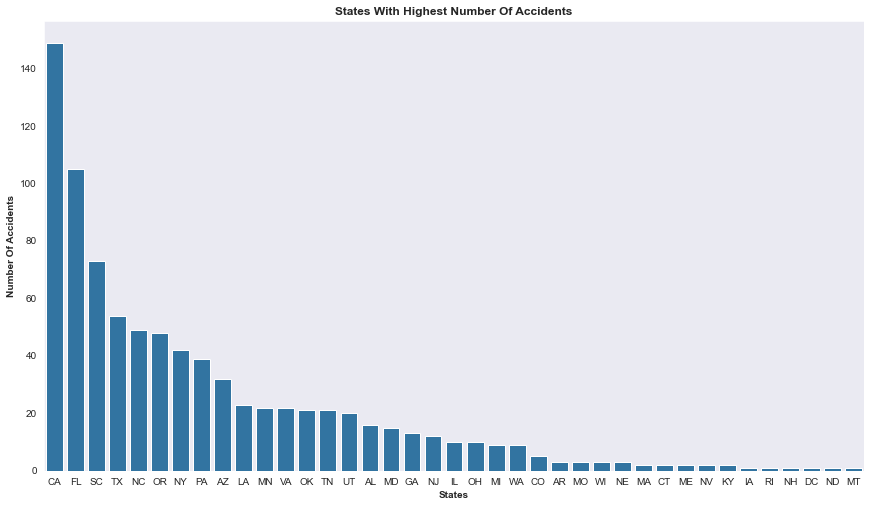

In [60]:
states_order = df.State.value_counts().index

my_fig()
my_count_plot(df, x='State', order = states_order)
my_axis(x='States', y ='Number of accidents',title='States with highest number of accidents')

In [61]:
# Number af accidents in California within the dataset time frame
df[df.State == 'CA'].count()[0]

149

In [62]:
ca_day = df[df.State == 'CA']

In [63]:
df.Weather_Condition.nunique()

29

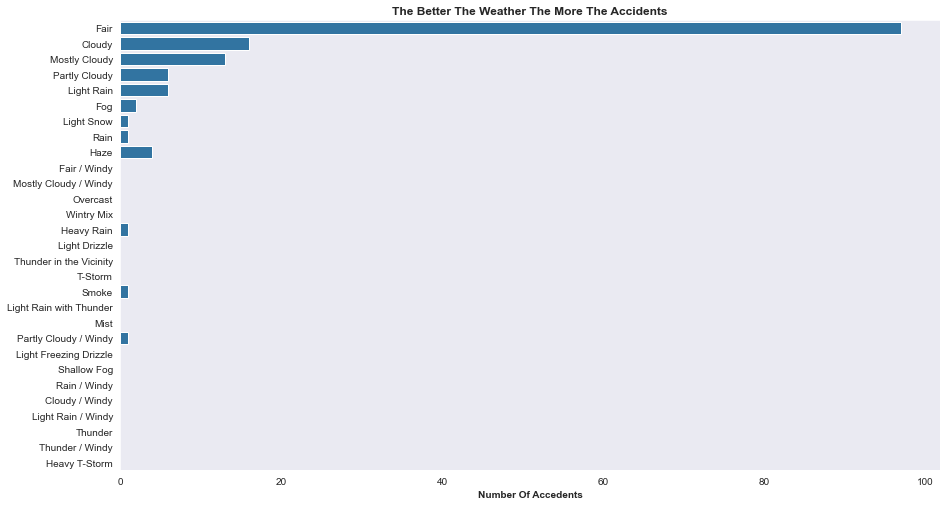

In [64]:
weather_cond = df.Weather_Condition.value_counts().index
my_fig()
my_count_plot(df = ca_day, y='Weather_Condition',order= weather_cond)
my_axis(x='number of accedents',title='the better the weather the more the accidents')

In [65]:
df.rename(columns={'Temperature(F)': 'Temp'}, inplace=True)

In [66]:
temp_mean = df.Temp.mean()

temp_mean

60.97355371900827

In [67]:
# Temp mean isnt working 

high_temp = df.query("Temp > 60.97")
low_temp = df.query("Temp <= 60.97")


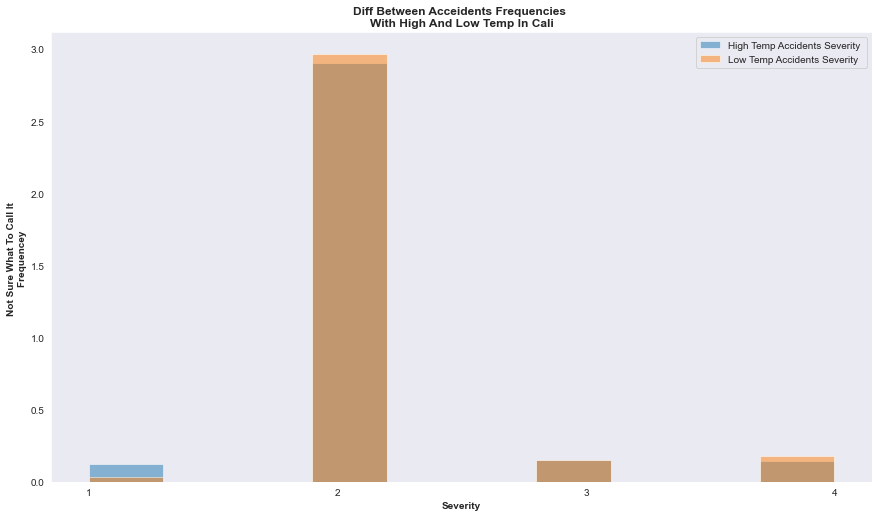

In [68]:
my_fig()
plt.hist(data = high_temp, x='Severity',density=True,alpha=0.5,label='High Temp Accidents Severity ');
plt.xticks([1,2,3,4]);
plt.hist(data= low_temp, x='Severity', density=True,alpha =0.5, label= 'Low Temp Accidents Severity',);
plt.legend();
my_axis(x= 'Severity', y= 'not sure what to call it \nFrequencey ', title="diff between acceidents frequencies \nwith high and low temp in cali");

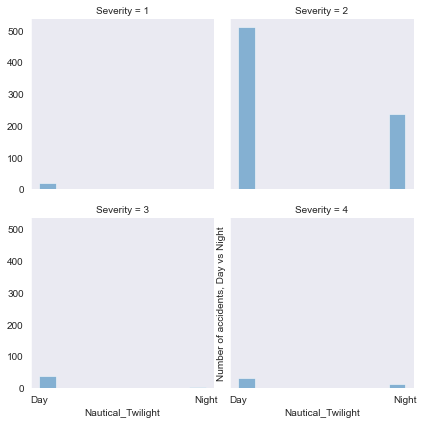

In [69]:
g = sns.FacetGrid(data = df, col='Severity', col_wrap=2,margin_titles=True);
g.map(plt.hist, 'Nautical_Twilight',alpha=0.5 );
plt.ylabel('Number of accidents, Day vs Night');

In [70]:
df.columns

Index(['id', 'Severity', 'Start_Time', 'End_Time', 'Start_Lat', 'Start_Lng',
       'End_Lat', 'End_Lng', 'Distance(mi)', 'Description', 'Number', 'Street',
       'Side', 'City', 'County', 'State', 'Zipcode', 'Country', 'Timezone',
       'Airport_Code', 'Weather_Timestamp', 'Temp', 'Wind_Chill(F)',
       'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Direction',
       'Wind_Speed(mph)', 'Precipitation(in)', 'Weather_Condition', 'Amenity',
       'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway',
       'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal',
       'Turning_Loop', 'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight'],
      dtype='object')

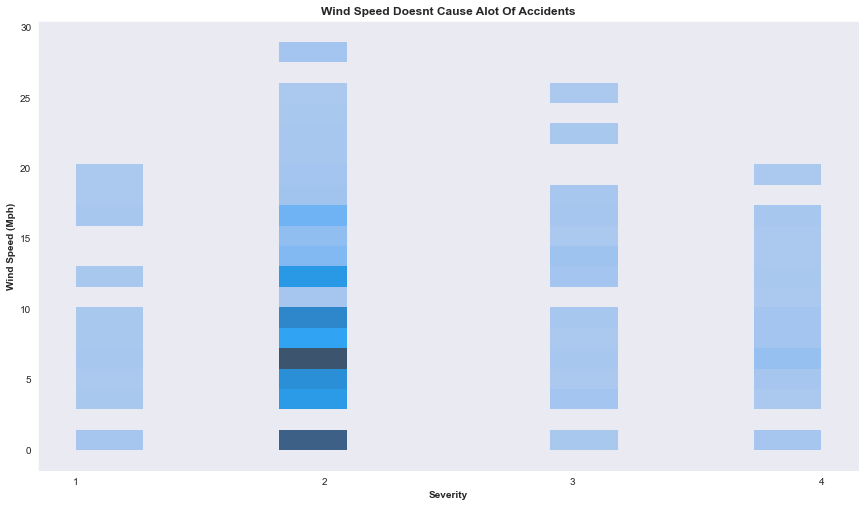

In [71]:
my_fig()
sns.histplot(x=df['Severity'], y = df['Wind_Speed(mph)'])
plt.xticks([1,2,3,4]);
my_axis(x='severity', y ='Wind Speed (mph)' ,title='Wind Speed doesnt cause alot of accidents')

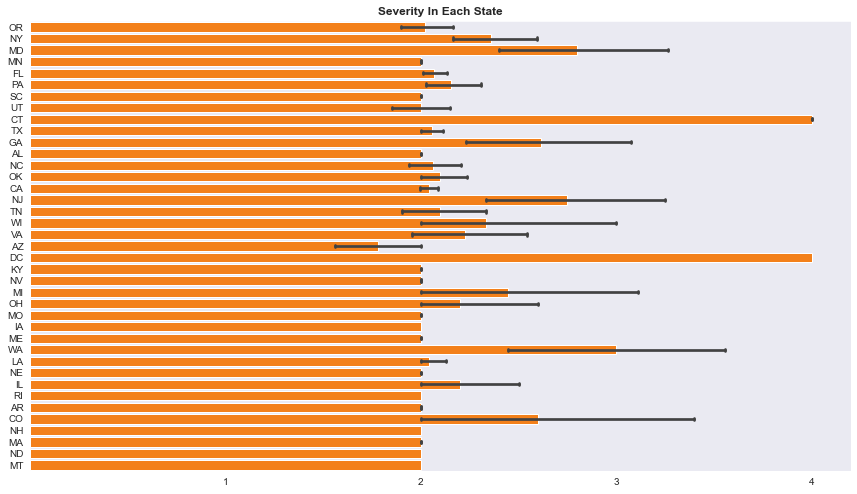

In [72]:
my_fig()
sns.barplot(x= 'Severity', y='State', data = df, color= sns.color_palette()[1] , saturation= 0.9, capsize= 0.2)
plt.xticks([1,2,3,4]);
my_axis(title="severity in each state")

In [73]:
import folium

In [74]:
dir(folium)

['Choropleth',
 'Circle',
 'CircleMarker',
 'ClickForMarker',
 'ColorLine',
 'ColorMap',
 'CssLink',
 'CustomIcon',
 'Div',
 'DivIcon',
 'Element',
 'FeatureGroup',
 'Figure',
 'FitBounds',
 'GeoJson',
 'GeoJsonPopup',
 'GeoJsonTooltip',
 'Html',
 'IFrame',
 'Icon',
 'JavascriptLink',
 'LatLngPopup',
 'LayerControl',
 'LinearColormap',
 'Link',
 'MacroElement',
 'Map',
 'Marker',
 'PolyLine',
 'Polygon',
 'Popup',
 'Rectangle',
 'RegularPolygonMarker',
 'StepColormap',
 'TileLayer',
 'Tooltip',
 'TopoJson',
 'Vega',
 'VegaLite',
 'WmsTileLayer',
 '__all__',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '__version__',
 '_version',
 'branca',
 'elements',
 'features',
 'folium',
 'map',
 'raster_layers',
 'sys',
 'utilities',
 'vector_layers']

In [75]:
df.columns

Index(['id', 'Severity', 'Start_Time', 'End_Time', 'Start_Lat', 'Start_Lng',
       'End_Lat', 'End_Lng', 'Distance(mi)', 'Description', 'Number', 'Street',
       'Side', 'City', 'County', 'State', 'Zipcode', 'Country', 'Timezone',
       'Airport_Code', 'Weather_Timestamp', 'Temp', 'Wind_Chill(F)',
       'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Direction',
       'Wind_Speed(mph)', 'Precipitation(in)', 'Weather_Condition', 'Amenity',
       'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway',
       'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal',
       'Turning_Loop', 'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight'],
      dtype='object')

In [76]:
map = folium.Map(location=[df.Start_Lat.mean(),
                           df.Start_Lng.mean()], zoom_start=14, control_scale=True)

In [77]:
map

In [78]:
mask = df.query("State == 'CA'")

In [98]:
ca_map = folium.Map(location=[mask.Start_Lat.mean(),
                              mask.Start_Lng.mean()], zoom_start=7, control_scale=True)

In [99]:
ca_map

In [100]:
for index, location_info in mask.iterrows():
    folium.Marker([location_info["End_Lat"], location_info["End_Lng"]], popup=location_info["Street"]).add_to(ca_map)

In [101]:
ca_map